In [1]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xlrd
import statsmodels.formula.api as smf

In [6]:
# Load the excel data using pandas from a reference to sheet name
xl_file = pd.read_excel(open('data/SystemAdministrators.xlsx','rb'), sheetname='data')
# Make sure we are getting data by viewing the first 10 rows
xl_file.head(10)

,Experience,Training,Completed task
0,10.9,4,Yes
1,9.9,4,Yes
2,10.4,6,Yes
3,13.7,6,Yes
4,9.4,8,Yes
5,12.4,4,Yes
6,7.9,6,Yes
7,8.9,4,Yes
8,10.2,6,Yes
9,11.4,4,Yes


In [12]:
# Format Completed task from yes/no to 1/0
completed_task = []
for ct in xl_file["Completed task"].tolist():
    if ct == "Yes":
        completed_task.append(1.0)
    else:
        completed_task.append(0.0)

In [13]:
# Setup of excel data into a data frame before we process any of it
discriminant_data = {}
discriminant_data["Experience"] = xl_file["Experience"].tolist()
discriminant_data["Training"] = xl_file["Training"].tolist()
discriminant_data["CompletedTask"] = completed_task

# Create a new data frame with just our new lists; Experience, Training, Completed task.
df = pd.DataFrame(discriminant_data, columns=["Experience", "Training", "CompletedTask"])
df.head()

,Experience,Training,CompletedTask
0,10.9,4,1.0
1,9.9,4,1.0
2,10.4,6,1.0
3,13.7,6,1.0
4,9.4,8,1.0


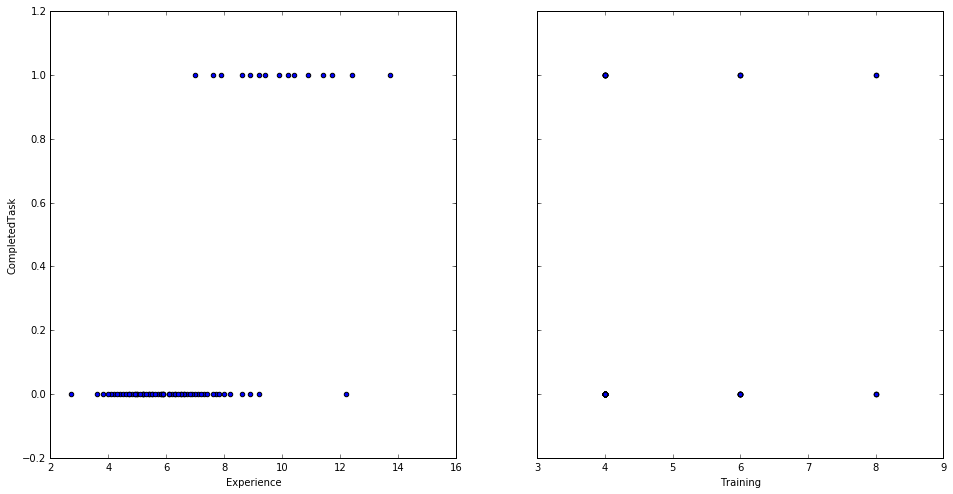

In [14]:
# Display the scatter plots each in a separate graph
fig, axs = plt.subplots(1, 2, sharey=True)
df.plot(kind='scatter', x='Experience', y='CompletedTask', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='Training', y='CompletedTask', ax=axs[1])

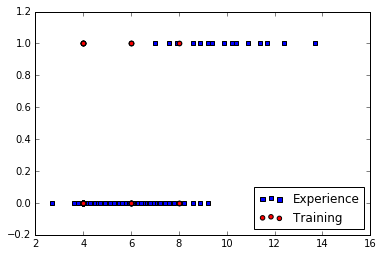

In [17]:
# Display the scatter plots in a different way to show them together
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df['Experience'], df['CompletedTask'], c='b', marker="s", label='Experience')
ax.scatter(df['Training'], df['CompletedTask'], c='r', marker="o", label='Training')
plt.legend(loc='lower right');
plt.show()